In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
df=pd.read_csv('train.csv')
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [4]:
df['Co-Applicant'].unique()

array([   1,    0, -999])

In [5]:
df['Has Active Credit Card'].unique()

array([nan, 'Unpossessed', 'Active', 'Inactive'], dtype=object)

In [6]:
#Removing unnecessary columns
df = df.drop(columns=["Customer ID", "Name"])

In [7]:
# Replace -999 with NaN
df['Co-Applicant'] = df['Co-Applicant'].replace(-999, np.nan)

# Option 1: Impute missing values (e.g., assume no co-applicant)
df['Co-Applicant'] = df['Co-Applicant'].fillna(0)

In [8]:
# Fill NaN with 'Unknown'
df['Has Active Credit Card'] = df['Has Active Credit Card'].fillna('Unknown')

# Optional: Encode as ordinal
credit_card_map = {
    'Unpossessed': 0,
    'Inactive': 1,
    'Active': 2,
    'Unknown': -1
}
df['Has Active Credit Card'] = df['Has Active Credit Card'].map(credit_card_map)


In [9]:
df.isnull().sum()

Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [10]:
#Filling null values
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Income (USD)']=df['Income (USD)'].fillna(df['Income (USD)'].median())
df['Income Stability']=df['Income Stability'].fillna(df['Income Stability'].mode()[0])

In [11]:
#Dropping this column due to presence of more null values and may categories
df['Type of Employment'].unique()
df=df.drop(columns=['Type of Employment'])

In [12]:
#Current Loan Expenses (USD) – Numeric → fill with median
df['Current Loan Expenses (USD)'] = df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].median())

#Dependents – Numeric → fill with mode (likely a small integer like 1 or 2)
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

#Credit Score – Numeric → fill with median
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())

#Property Age – Numeric → fill with median
df['Property Age'] = df['Property Age'].fillna(df['Property Age'].median())

#Property Location – Categorical → fill with mode
df['Property Location'] = df['Property Location'].fillna(df['Property Location'].mode()[0])

# Loan Sanction Amount (USD) - Numeric → fill with median
df['Loan Sanction Amount (USD)'] = df['Loan Sanction Amount (USD)'].fillna(df['Loan Sanction Amount (USD)'].median())

df['Loan Sanction Amount (USD)'] = df['Loan Sanction Amount (USD)'].replace(0, df['Loan Sanction Amount (USD)'].median())

In [13]:
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

Encoding of variables with values

In [14]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
cat_cols = [
    'Gender', 'Income Stability', 'Profession',
    'Expense Type 1', 'Expense Type 2',
    'Has Active Credit Card', 'Property Type', 'Property Location','Location'
]

# Create a label encoder instance
le = LabelEncoder()

# Apply label encoding to each column
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


Standardization of Features

In [15]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns (excluding categorical and target)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Optionally exclude target column (e.g., 'Loan Sanction Amount (USD)')
numeric_cols.remove('Loan Sanction Amount (USD)')

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numeric features
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [16]:
df.head(10)

,Gender,Age,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,-1.007092,0.991451,-0.061266,0.305833,0.834973,0.142149,-0.269027,-0.660358,-0.749241,-1.433524,...,0.992493,-0.490502,-2.096903,0.846998,-0.060969,1.376731,-1.214540,0.419205,-0.126419,54607.180
1,0.992958,-0.504355,0.229972,0.305833,0.834973,0.142149,-0.705269,0.392886,-0.749241,0.697582,...,0.578136,-0.490502,-1.001762,0.368086,0.230298,-0.411309,-1.214540,0.419205,-0.822772,37469.980
2,-1.007092,1.552379,-0.152389,-3.269763,-0.686548,0.142149,-0.726171,-0.946193,-0.749241,0.697582,...,1.330799,-0.490502,-1.001762,0.152923,-0.152102,-0.411309,1.283229,-2.385467,-0.634103,36474.430
3,-1.007092,1.552379,-0.033357,-3.269763,-0.686548,-1.762481,-0.147279,-0.422775,-0.749241,0.697582,...,1.324379,2.038728,-1.001762,1.346732,-0.032979,-0.411309,0.034344,0.419205,-0.110298,56040.540
4,-1.007092,-0.566680,0.004480,0.305833,0.834973,0.142149,0.420461,0.374693,-0.749241,0.697582,...,0.080879,2.038728,1.188520,0.739417,0.004783,1.376731,0.034344,0.419205,0.821057,74008.280
5,-1.007092,1.240752,-0.128594,0.305833,-0.306168,-1.762481,-0.913593,-0.906788,-0.749241,-1.433524,...,-0.795636,2.038728,0.093379,-0.037948,-0.128305,-0.411309,-1.214540,0.419205,-0.947245,22382.570
6,0.992958,0.181223,-0.019940,0.305833,0.834973,0.142149,1.070530,1.227526,1.334685,0.697582,...,-1.463830,-0.490502,-1.001762,-0.954127,-0.019639,-1.305329,0.034344,0.419205,0.954495,35209.395
7,-1.007092,0.305874,-0.033357,0.305833,-0.306168,0.142149,2.544436,1.682224,-0.749241,-1.433524,...,1.032730,-0.490502,1.188520,-0.652204,-0.032979,-0.411309,1.283229,0.419205,2.878533,168218.240
8,-1.007092,-0.130403,-0.122697,0.305833,0.834973,-1.762481,-0.901713,-1.012348,-0.749241,0.697582,...,-0.493571,2.038728,1.188520,-0.905541,-0.122407,1.376731,-1.214540,0.419205,-0.821570,22842.290
9,0.992958,-1.376908,-0.098577,0.305833,0.834973,-1.762481,-0.784989,0.411038,-0.749241,-1.433524,...,-1.806987,-0.490502,-1.001762,1.322440,-0.098284,-0.411309,1.283229,0.419205,-0.681642,35209.395


EDA

Histogram

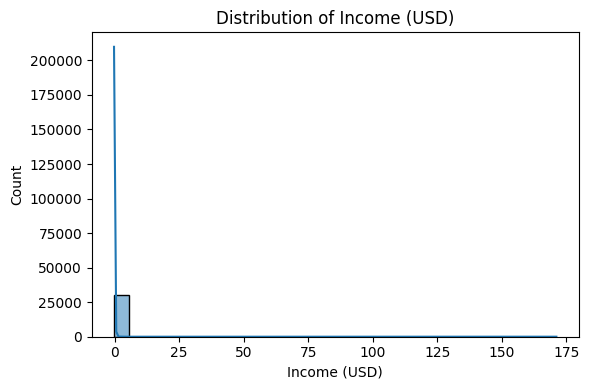

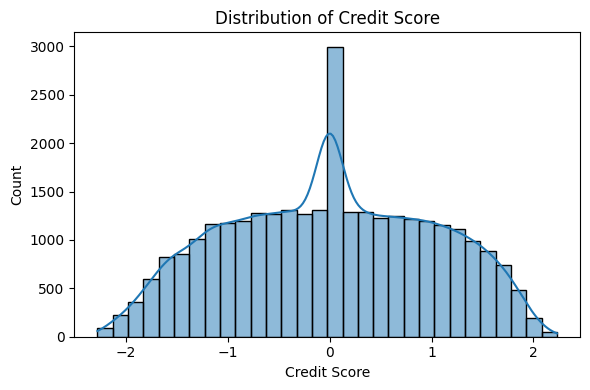

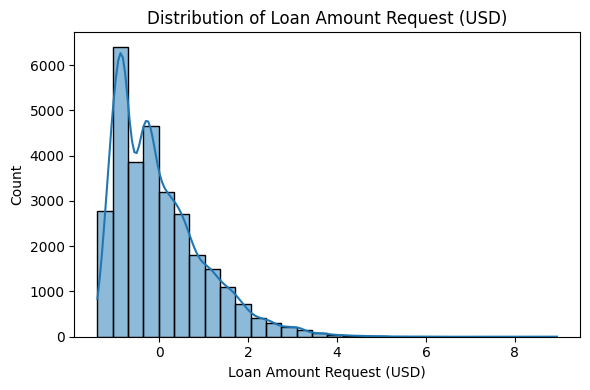

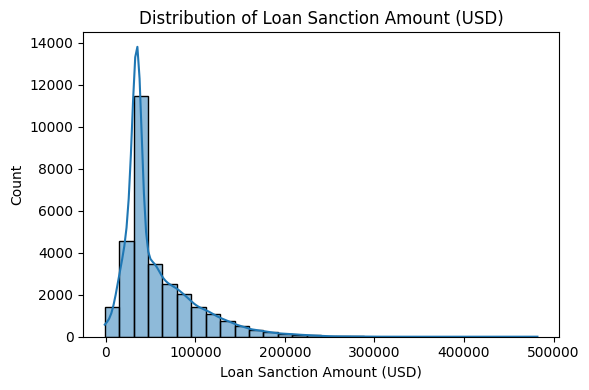

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distributions for selected numeric columns
cols_to_plot = ['Income (USD)', 'Credit Score', 'Loan Amount Request (USD)', 'Loan Sanction Amount (USD)']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


Scatter Plot

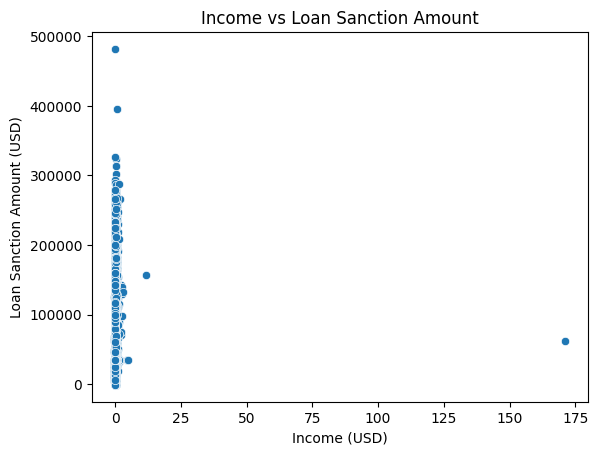

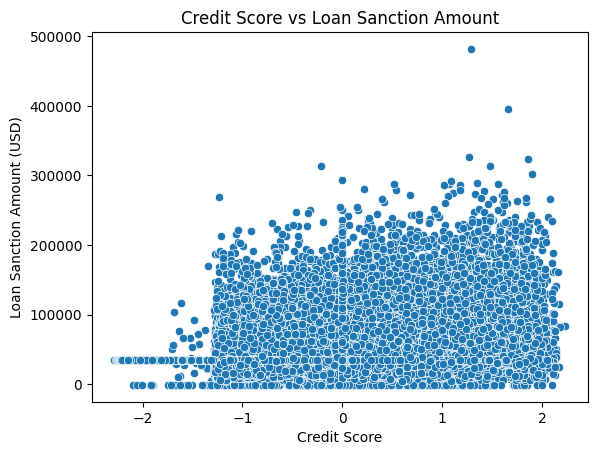

In [18]:
# Income vs Loan Sanction Amount
sns.scatterplot(data=df, x='Income (USD)', y='Loan Sanction Amount (USD)')
plt.title('Income vs Loan Sanction Amount')
plt.show()

# Credit Score vs Loan Sanction Amount
sns.scatterplot(data=df, x='Credit Score', y='Loan Sanction Amount (USD)')
plt.title('Credit Score vs Loan Sanction Amount')
plt.show()


Correlation heatmap

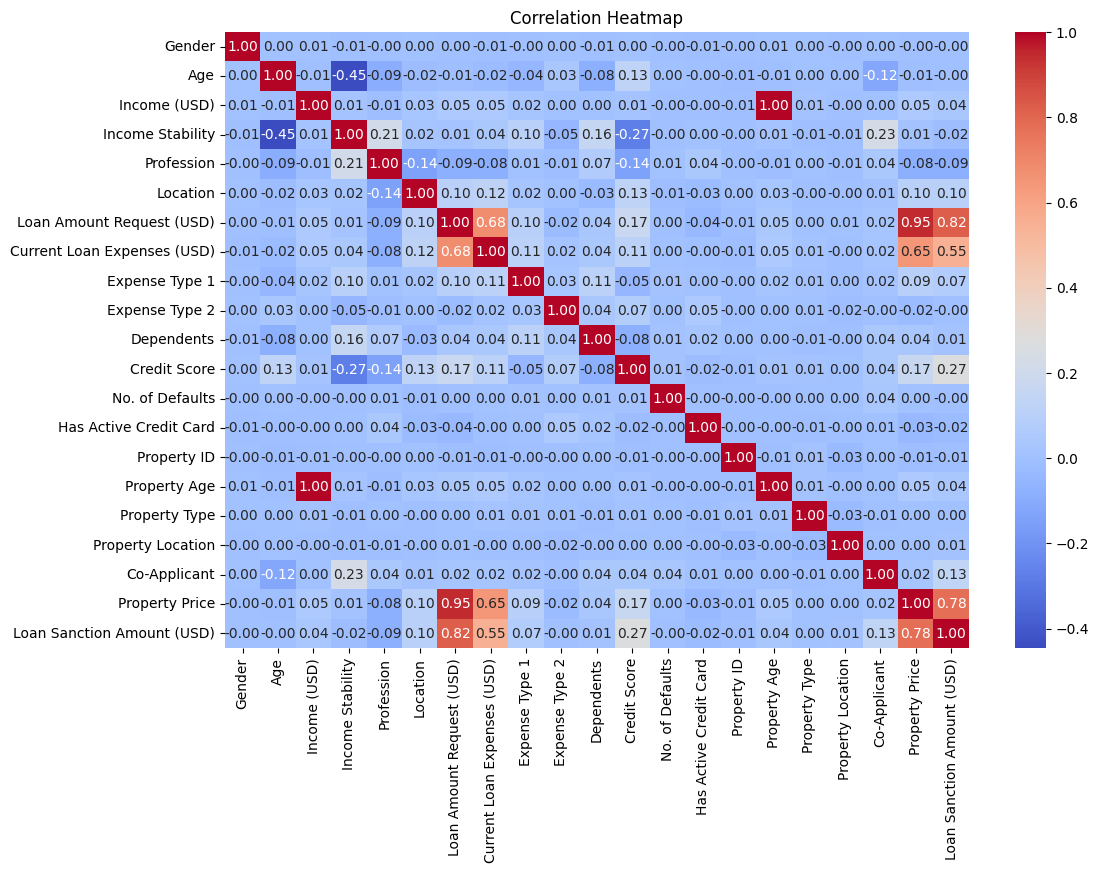

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


BoxPlot

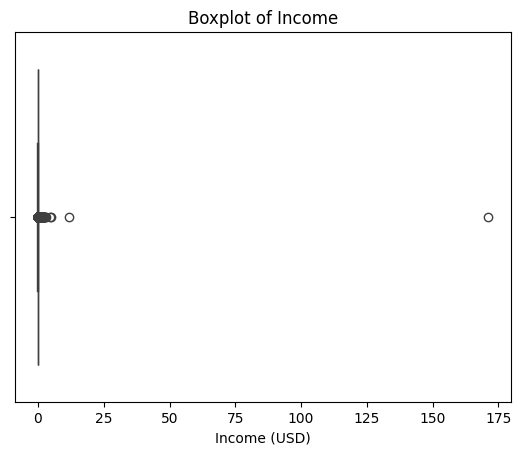

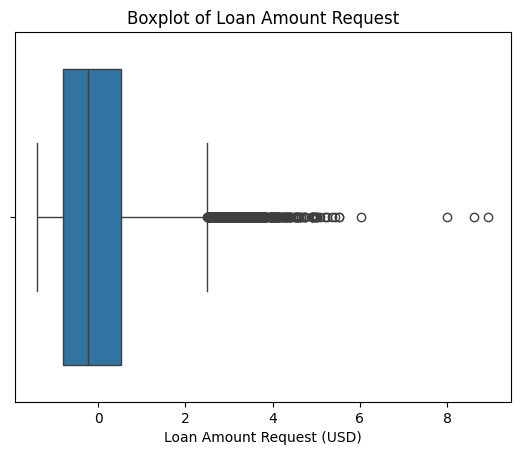

In [20]:
# Boxplot for Income
sns.boxplot(x=df['Income (USD)'])
plt.title('Boxplot of Income')
plt.show()

# Boxplot for Loan Amount Request
sns.boxplot(x=df['Loan Amount Request (USD)'])
plt.title('Boxplot of Loan Amount Request')
plt.show()

In [27]:
# Define target variable
target = 'Loan Sanction Amount (USD)'

# Define feature columns
X = df.drop(columns=[target])
y = df[target]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Grid Search

In [28]:
# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVR model
svr = SVR()

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit on training set
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (R²):", grid_search.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.4min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.5min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.6min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.6min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.7min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 1.9min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 2.1min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 2.1min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 1.7min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 1.8min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 2.1min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 1.9min
[CV] END ...................

KeyboardInterrupt: 

In [ ]:
# Train SVR with best parameters on training + validation set
best_svr = grid_search.best_estimator_
best_svr.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))

# Predictions on test set
y_pred = best_svr.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")